## This is my first Machine learning project using Google's TensorFlow and Colab, together. We will use a small training set of 5 examples and train a  model whihc will learn how to convert a temperature reading from celcius and convert it into Fahrenheit. Lets dig into it.

In [ ]:
"""Lets import all the packages we might need in this notebook"""
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt
from datetime import datetime

### Lets set up some of the training data for training our model.


In [ ]:
x = np.array([22, 75] , dtype = 'float')      # input temperatures in degree celcius
y = np.array([71.6, 167] , dtype = 'float') # output temperatures in degree Fahrenheit

for i,c in enumerate(x):
  print(f"{c} degree celcius is equivalent to {y[i]} degree Fahrenheit.")
 

22.0 degree celcius is equivalent to 71.6 degree Fahrenheit.
75.0 degree celcius is equivalent to 167.0 degree Fahrenheit.


## Create/Define the *model*

We will use the simplest model, a Dense network, with  only one unit. Since the problem is straightforward, we only need one layer with a single neuron.

In [ ]:
 
model =  tf.keras.Sequential()                            # initialising a Sequential model
l0 = tf.keras.layers.Dense(units = 1, input_shape= [1], activation=None)   # initialising a Dense layer with one unit.
model.add(l0)                                             # adding the dense layer to the model.

## Compile the model, with Loss and optimizer functions.

**Loss Function** : A way of measuring how far off our predictions are from 
the expected output.

 **Optimizer Function** :  A way of adjusting parameters in order to reduce the loss.

In [ ]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.08))  
 
# we chose "Mean Squared Error" and the loss function and Adam optimizer for compiling our model.

## Train the Model

In [ ]:
tic = datetime.now()
history  = model.fit(x, y, epochs = 5000, verbose = False)
toc = datetime.now()
 
print("Finished Training the Model in :" + str((toc-tic).microseconds) + ' microseconds')

Finished Training the Model in :410189 microseconds


## Lets take a look at the training statistics

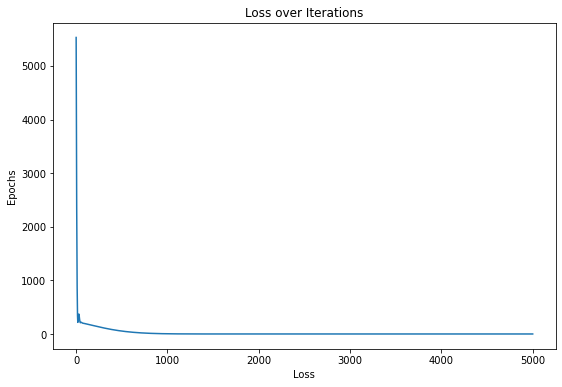

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
 
ax.set_title('Loss over Iterations')
ax.set_xlabel('Loss')
ax.set_ylabel('Epochs')
ax.plot(history.history['loss'])
plt.show()

## Lets predict the values in Fahrenheit for a few given values in celcius and see how accurate is our model.

In [ ]:
print(model.predict([100,101,22, 23]))

[[212.00003]
 [213.80002]
 [ 71.59998]
 [ 73.39999]]


### As you see, this is pretty accurate. We didnt feed any formula to our model rather its our model whihc learnt the conversion formula on itself, using the five labeled training examples we passed on to the model. This is amazing !!!

In [ ]:
print(l0.get_weights())

[array([[1.8000005]], dtype=float32), array([31.999971], dtype=float32)]


In [ ]:
print(history.history['loss'][100])
print(history.history['loss'][500])
print(history.history['loss'][800])
print(history.history['loss'][1200])
print(history.history['loss'][1600])
print(history.history['loss'][1800])
print(history.history['loss'][1999])

191.933349609375
54.133811950683594
12.624629974365234
0.9069055914878845
0.02631884068250656
0.0030367765575647354
0.00026490469463169575
